In [7]:
import pandas as p
credit=p.read_csv("credictcard_data_german.csv",sep=" ")
print(credit.dtypes)
credit.head()

checking account      object
duration [month]       int64
credit history        object
purpose               object
amount                 int64
savings               object
employment            object
installment            int64
status                object
debtors               object
resident since         int64
property              object
age [years]            int64
plans                 object
housing               object
existing credits       int64
job                   object
maintaining people     int64
phone registered      object
foreign worker        object
classification        object
dtype: object


,checking account,duration [month],credit history,purpose,amount,savings,employment,installment,status,debtors,...,property,age [years],plans,housing,existing credits,job,maintaining people,phone registered,foreign worker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,good
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,bad
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,good
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,good
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,bad


### A Korrelation zwischen intervallskalierten Variablen
Erstellen Sie ein Balkendiagramm, welches die 10 stärksten Korrelationen zwischen intervallskalierten Variablen sortiert visuell darstellt (von hoher Korrelation zu niedriger Korrelation). 

In [88]:
credit.corr()#zeigt die Korrelation aller intervallskalierten Variablen in einer Korrelationsmatrix

,duration [month],amount,installment,resident since,age [years],existing credits,maintaining people
duration [month],1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
installment,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
resident since,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
age [years],-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
existing credits,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
maintaining people,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


In [11]:
#Algorithmus um konkrete Korrelation zu berechnen (nicht die komplette Korrelationsmatrix)
coors=[];
names=[]
correlations=[]
for var in credit.dtypes.items():
    if var[1].name=="int64":
        
        for othervar in credit.dtypes.items():
            if (var[0]==othervar[0]):
                break
            if ((othervar[1].name=="int64") ):        
                
                correlation=credit[var[0]].corr(credit[othervar[0]])
                #print(var[0],othervar[0],"correl:",correlation)
                names.append(var[0]+"-"+othervar[0])
                coors.append(correlation)
                correlations.append([abs(correlation),correlation,var[0]+"-"+othervar[0]])
                #add name and coors
                



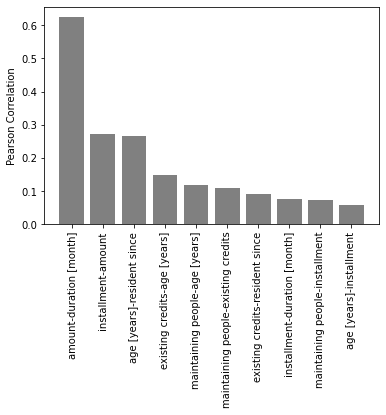

In [13]:
import matplotlib.pyplot as pp
import numpy as n
correlations.sort(reverse=True)
heights=[]
labels=[]
for i in range(10):
    correlation=correlations[i]
    heights.append(correlation[0])
    labels.append(correlation[2])
    
figure,axis=pp.subplots()
pp.xticks(rotation=90)
axis.bar(x=n.arange(len(heights)),height=heights,tick_label=labels,color="gray")
axis.set_ylabel("Pearson Correlation");


### B Bewertung von Gruppen
Messen Sie die stat. Abhängig von duration mit der Zielvariablen classification. Stellen Sie die Mittelwerte und Std-Abweichungen von duration getrennt nach den Ausprägungen der Zielvariablen visuell dar.

In [15]:
from scipy.stats  import ttest_ind
subset_good=credit[credit.classification=="good"]
subset_bad=credit[credit.classification=="bad"]
for testvar in credit.keys():
    if credit.dtypes[testvar]=="int64": #int64 == interval scaled variable
        tval,pval=ttest_ind(subset_good[testvar],subset_bad[testvar])
        print("testvariable:",testvar,"tval=",'{:f}'.format(abs(tval)),"pval=",'{:f}'.format(pval))


testvariable: duration [month] tval= 6.952251 pval= 0.000000
testvariable: amount tval= 4.947966 pval= 0.000001
testvariable: installment tval= 2.293342 pval= 0.022035
testvariable: resident since tval= 0.093736 pval= 0.925337
testvariable: age [years] tval= 2.890847 pval= 0.003925
testvariable: existing credits tval= 1.446255 pval= 0.148420
testvariable: maintaining people tval= 0.095243 pval= 0.924141


In [20]:
subset_bad["resident since"].mean()

2.85

[2.842857142857143, 2.85] [[0, 0], [1.1083725362591117, 1.0946051960031329]]


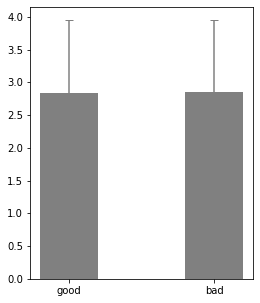

In [22]:
figure,axis=pp.subplots(figsize=(4,5))
heights=[subset_good["resident since"].mean(),subset_bad["resident since"].mean()]
stds=[[0,0],[subset_good["resident since"].std(),subset_bad["resident since"].std()]]
print(heights,stds)
axis.bar(x=n.arange(len(heights)),height=heights,tick_label=["good","bad"],color="gray",yerr=stds,ecolor="gray",width=0.4,capsize=4);

[19.207142857142856, 24.86] [[0, 0], [11.079564266189928, 13.282638856163995]]


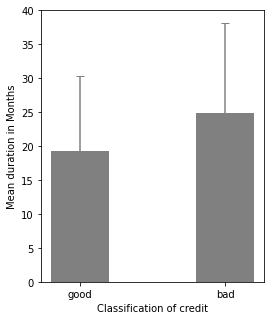

In [93]:
figure,axis=pp.subplots(figsize=(4,5))
heights=[subset_good["duration [month]"].mean(),subset_bad["duration [month]"].mean()]
stds=[[0,0],[subset_good["duration [month]"].std(),subset_bad["duration [month]"].std()]]
print(heights,stds)
axis.bar(x=n.arange(len(heights)),height=heights,tick_label=["good","bad"],color="gray",yerr=stds,ecolor="gray",width=0.4,capsize=4)
axis.set_ylabel("Mean duration in Months");
axis.set_xlabel("Classification of credit");


good: $\mu=19.2 \pm \sigma=11.1$ Monate  bad: $\mu=24.8 \pm \sigma=13.3$ Monate

### C Bewertung kategorischer Variablen
Geben Sie die Kontingenztabelle von i) checking account vs classification und ii) job vs classification mitsamt X²-Wert und p-Wert an. Welche Aussage kann aus dem p-Wert und der Kontingenztabelle abgeleitet werden?

In [78]:
def chisquare(varname):
    contingencyTable=p.crosstab(credit[varname],credit.classification)
    chi2,pval,dof,expectedFreq=chi2_contingency(contingencyTable)
    print("\n\ntestvar:",varname,"chi2=",chi2,"pval=",'{:f}'.format(pval),"dof=",dof)#show pval in non-scienetific expression
    return contingencyTable

In [79]:
chisquare("job")



testvar: job chi2= 1.8851560280131707 pval= 0.596582 dof= 3


classification,bad,good
job,,
A171,7,15
A172,56,144
A173,186,444
A174,51,97


In [80]:
chisquare("checking account")



testvar: checking account chi2= 123.72094351626559 pval= 0.000000 dof= 3


classification,bad,good
checking account,,
A11,135,139
A12,105,164
A13,14,49
A14,46,348
